# House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Evaluation
Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [530]:
#importing libraries
import pandas as pd
import numpy as np

In [531]:
house_data=pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [532]:
house_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [533]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [534]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [535]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

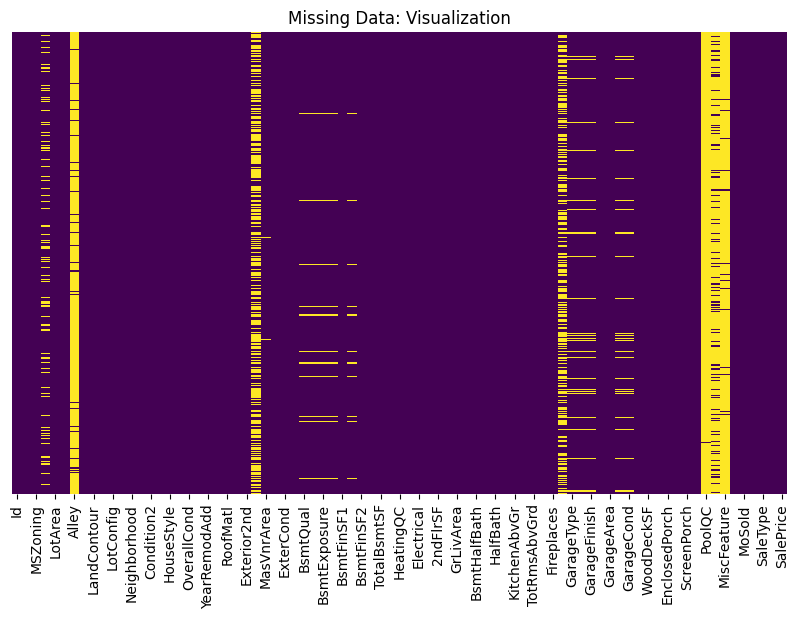

In [536]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(house_data.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Data: Visualization')
plt.show()


In [537]:
columns_to_drop=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']
house_data.drop(columns=columns_to_drop,inplace=True)

In [538]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [539]:
missing_values_columns=['LotFrontage','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',     
'Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]
# Get the data types for selected columns
data_types_selected = house_data[missing_values_columns].dtypes
data_types_selected

LotFrontage     float64
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

Categorical Values: Missing Values

In [540]:
house_data['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [541]:
most_frequent_category = house_data['Electrical'].mode()[0]
house_data['Electrical'].fillna(most_frequent_category, inplace=True)

In [542]:
house_data['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [543]:
#Replace missing values with "Unknown" Category
house_data['BsmtQual'].fillna('Unknown',inplace=True)

In [544]:
house_data['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [545]:
#Replace missing values with "Unknown" Category
house_data['BsmtCond'].fillna('Unknown',inplace=True)

In [546]:
house_data['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [547]:
#Replace missing values with "Unknown" Category
house_data['BsmtExposure'].fillna('Unknown',inplace=True)

In [548]:
house_data['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [549]:
#Replace missing values with "Unknown" Category
house_data['BsmtFinType1'].fillna('Unknown',inplace=True)

In [550]:
house_data['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [551]:
#Replace missing values with "Unknown" Category
house_data['BsmtFinType2'].fillna('Unknown',inplace=True)

In [552]:
house_data['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [553]:
#Replace missing values with "Unknown" Category
house_data['GarageType'].fillna('Unknown',inplace=True)

In [554]:
house_data['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [555]:
#Replace missing values with "Unknown" Category
house_data['GarageQual'].fillna('Unknown',inplace=True)

In [556]:
house_data['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [557]:
#Replace missing values with "Unknown" Category
house_data['GarageFinish'].fillna('Unknown',inplace=True)

In [558]:
house_data['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [559]:
#Replace missing values with "Unknown" Category
house_data['GarageCond'].fillna('Unknown',inplace=True)

In [560]:
house_data['BsmtExposure'].value_counts()

BsmtExposure
No         953
Av         221
Gd         134
Mn         114
Unknown     38
Name: count, dtype: int64

In [561]:
#Replace missing values with "Unknown" Category
house_data['BsmtExposure'].fillna('Unknown',inplace=True)

Numerical Values with missing values

In [562]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [563]:
house_data['LotFrontage'].mean()

70.04995836802665

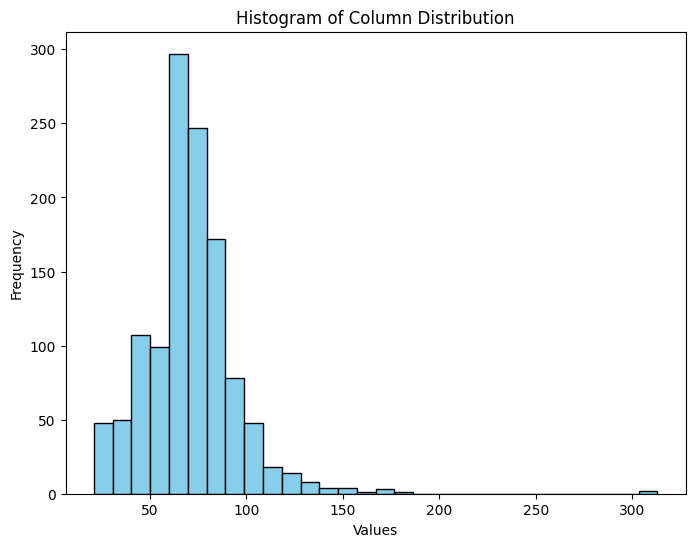

In [564]:
import matplotlib.pyplot as plt

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(house_data['LotFrontage'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Distribution')
plt.show()


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


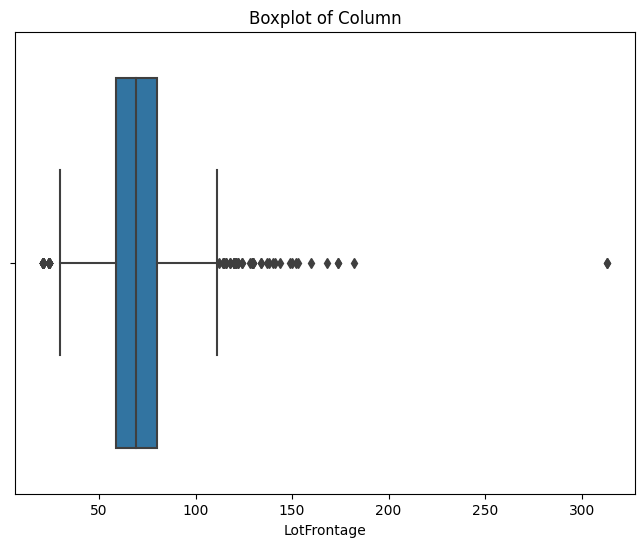

In [565]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=house_data['LotFrontage'])
plt.title('Boxplot of Column')
plt.show()


In [566]:
# Calculate the median of the column
median_value =house_data['LotFrontage'].median()

# Fill missing values in the column with the calculated median
house_data['LotFrontage'].fillna(median_value, inplace=True)


In [567]:
house_data['MasVnrArea'].mean()

103.68526170798899

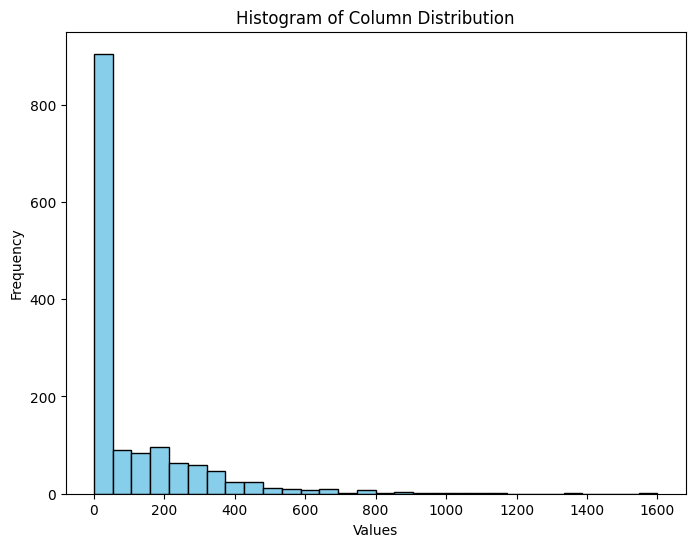

In [568]:
import matplotlib.pyplot as plt

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(house_data['MasVnrArea'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Distribution')
plt.show()


In [569]:
# Calculate the median of the column
median_value =house_data['MasVnrArea'].median()

# Fill missing values in the column with the calculated median
house_data['MasVnrArea'].fillna(median_value, inplace=True)


In [570]:
house_data['GarageYrBlt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [571]:
#Impute with a Default or Sentinel Value
house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\411558878.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1900-01-01 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


In [572]:
house_data['GarageYrBlt']=pd.to_datetime(house_data['GarageYrBlt'])
house_data['GarageYrBlt']=house_data['GarageYrBlt'].dt.year

In [573]:
house_data['GarageYrBlt']

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
1455    1970
1456    1970
1457    1970
1458    1970
1459    1970
Name: GarageYrBlt, Length: 1460, dtype: int32

In [574]:
house_data['GarageYrBlt']

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
1455    1970
1456    1970
1457    1970
1458    1970
1459    1970
Name: GarageYrBlt, Length: 1460, dtype: int32

In [575]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

Series([], dtype: int64)

No Missing Values available

In [576]:
house_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Feature Engineering:Handling Categorical Data

In [577]:
#columns with categorical data
categorical_columns=house_data.select_dtypes(include=['object','category'])
categorical_columns.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [578]:
# Dummy encoding the categorical columns
dummy_variables = pd.get_dummies(categorical_columns, drop_first=True)
# Drop the original categorical columns from the DataFrame
house_data_encoded = house_data.drop(categorical_columns.columns, axis=1)
# Concatenate the dummy-encoded columns with the original DataFrame
house_data_encoded = pd.concat([house_data_encoded, dummy_variables], axis=1)


In [579]:
house_data_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


Numerical Features

In [580]:
# Selecting only the numerical columns
numerical_columns =house_data_encoded.select_dtypes(include=['number']).columns.tolist()
items_to_remove=['YrSold','MoSold','GarageYrBlt','YearBuilt','YearRemodAdd','Id']
# Removing multiple items using list comprehension
numerical_columns = [col for col in numerical_columns if col not in items_to_remove]


In [581]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [582]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
house_data_encoded[numerical_columns] = scaler.fit_transform(house_data_encoded[numerical_columns])


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [583]:
house_data_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.073375,-0.220875,-0.207142,0.651479,-0.517200,2003,2003,0.514104,0.575425,...,False,False,False,False,True,False,False,False,True,False
1,2,-0.872563,0.460320,-0.091886,-0.071836,2.179628,1976,1976,-0.570750,1.171992,...,False,False,False,False,True,False,False,False,True,False
2,3,0.073375,-0.084636,0.073480,0.651479,-0.517200,2001,2002,0.325915,0.092907,...,False,False,False,False,True,False,False,False,True,False
3,4,0.309859,-0.447940,-0.096897,0.651479,-0.517200,1915,1970,-0.570750,-0.499274,...,False,False,False,False,True,False,False,False,False,False
4,5,0.073375,0.641972,0.375148,1.374795,-0.517200,2000,2000,1.366489,0.463568,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,1999,2000,-0.570750,-0.973018,...,False,False,False,False,True,False,False,False,True,False
1456,1457,-0.872563,0.687385,0.266407,-0.071836,0.381743,1978,1988,0.087911,0.759659,...,False,False,False,False,True,False,False,False,True,False
1457,1458,0.309859,-0.175462,-0.147810,0.651479,3.078570,1941,2006,-0.570750,-0.369871,...,False,False,False,False,True,False,False,False,True,False
1458,1459,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,1950,1996,-0.570750,-0.865548,...,False,False,False,False,True,False,False,False,True,False


Pearson Correlation

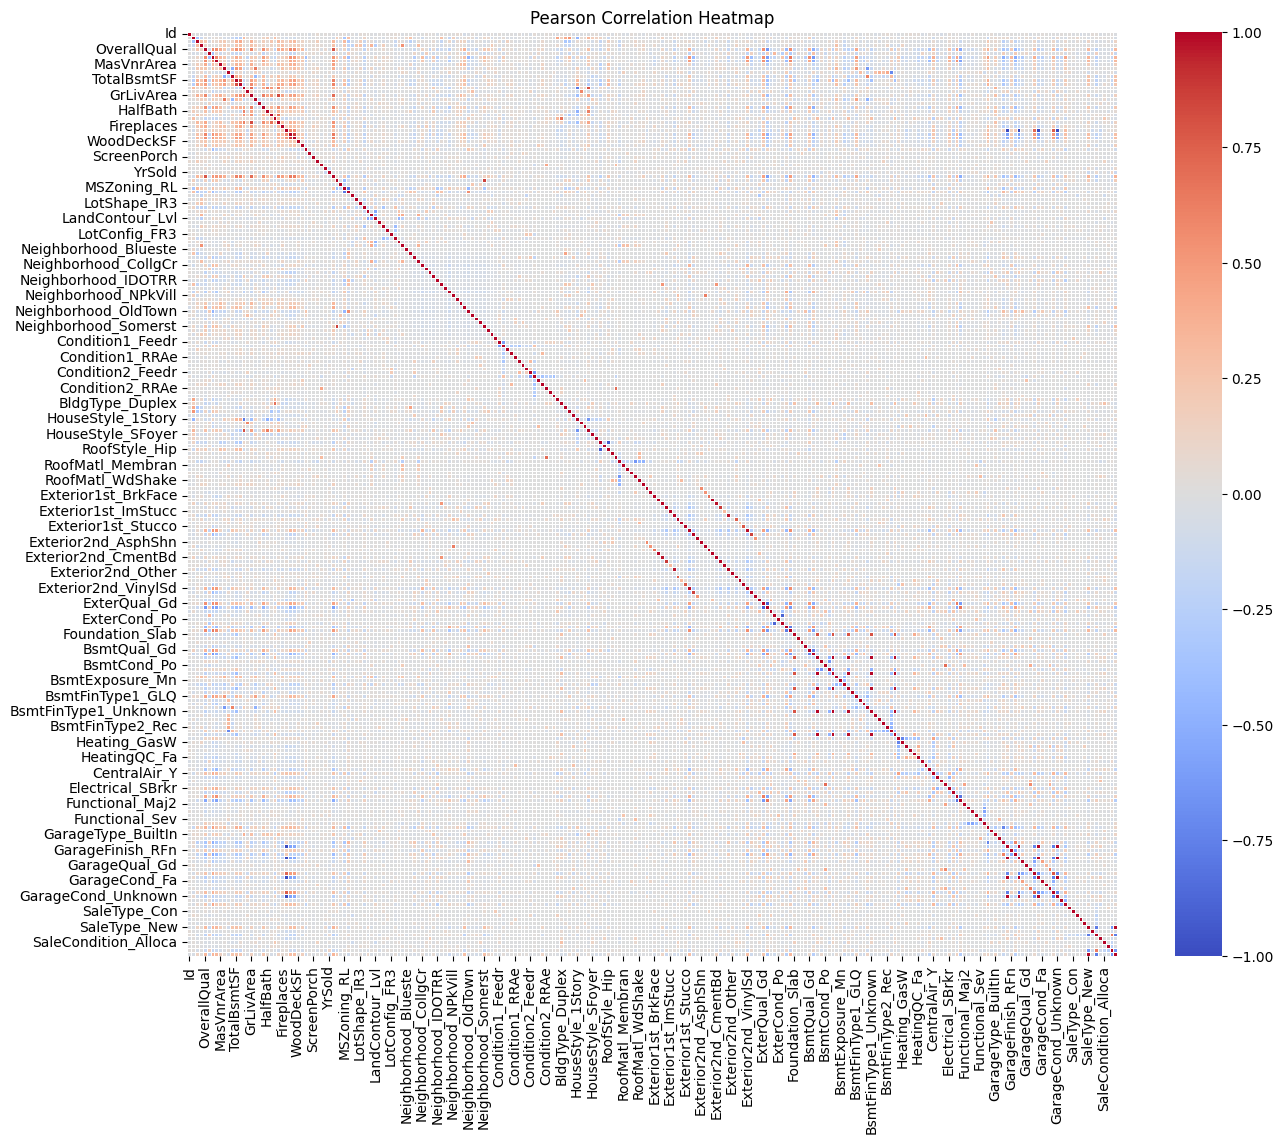

In [584]:

correlation_matrix =house_data_encoded.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

Applying Linear Regression

# Multiple Linear Regression



In [585]:
house_data_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.073375,-0.220875,-0.207142,0.651479,-0.517200,2003,2003,0.514104,0.575425,...,False,False,False,False,True,False,False,False,True,False
1,2,-0.872563,0.460320,-0.091886,-0.071836,2.179628,1976,1976,-0.570750,1.171992,...,False,False,False,False,True,False,False,False,True,False
2,3,0.073375,-0.084636,0.073480,0.651479,-0.517200,2001,2002,0.325915,0.092907,...,False,False,False,False,True,False,False,False,True,False
3,4,0.309859,-0.447940,-0.096897,0.651479,-0.517200,1915,1970,-0.570750,-0.499274,...,False,False,False,False,True,False,False,False,False,False
4,5,0.073375,0.641972,0.375148,1.374795,-0.517200,2000,2000,1.366489,0.463568,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,1999,2000,-0.570750,-0.973018,...,False,False,False,False,True,False,False,False,True,False
1456,1457,-0.872563,0.687385,0.266407,-0.071836,0.381743,1978,1988,0.087911,0.759659,...,False,False,False,False,True,False,False,False,True,False
1457,1458,0.309859,-0.175462,-0.147810,0.651479,3.078570,1941,2006,-0.570750,-0.369871,...,False,False,False,False,True,False,False,False,True,False
1458,1459,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,1950,1996,-0.570750,-0.865548,...,False,False,False,False,True,False,False,False,True,False


m= 1460
n=240

In [586]:
# Get a list of all columns except the specific column
columns_except_specific = [col for col in house_data_encoded.columns if col != 'SalePrice']
# Reorder the columns putting the specific column at the end
ordered_columns = columns_except_specific + ['SalePrice']
# Create a new DataFrame with columns reordered
house = house_data_encoded[ordered_columns]

In [587]:
house_data_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.073375,-0.220875,-0.207142,0.651479,-0.517200,2003,2003,0.514104,0.575425,...,False,False,False,False,True,False,False,False,True,False
1,2,-0.872563,0.460320,-0.091886,-0.071836,2.179628,1976,1976,-0.570750,1.171992,...,False,False,False,False,True,False,False,False,True,False
2,3,0.073375,-0.084636,0.073480,0.651479,-0.517200,2001,2002,0.325915,0.092907,...,False,False,False,False,True,False,False,False,True,False
3,4,0.309859,-0.447940,-0.096897,0.651479,-0.517200,1915,1970,-0.570750,-0.499274,...,False,False,False,False,True,False,False,False,False,False
4,5,0.073375,0.641972,0.375148,1.374795,-0.517200,2000,2000,1.366489,0.463568,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,1999,2000,-0.570750,-0.973018,...,False,False,False,False,True,False,False,False,True,False
1456,1457,-0.872563,0.687385,0.266407,-0.071836,0.381743,1978,1988,0.087911,0.759659,...,False,False,False,False,True,False,False,False,True,False
1457,1458,0.309859,-0.175462,-0.147810,0.651479,3.078570,1941,2006,-0.570750,-0.369871,...,False,False,False,False,True,False,False,False,True,False
1458,1459,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,1950,1996,-0.570750,-0.865548,...,False,False,False,False,True,False,False,False,True,False


In [596]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [597]:
X=house_data_encoded.iloc[:,:-1]

In [598]:
y=house_data_encoded['SalePrice']

In [599]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=7)

In [600]:
# Initialize the linear regression model
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train, y_train)

c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

LinearRegression()

In [601]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 7.349176383035752e-14
Mean Squared Error: 1.2918328399767166e-26
Root Mean Squared Error: 1.1365882455738827e-13
R2 Score: 1.0


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [590]:
#initilaize testing data
test_house_data=pd.read_csv('test (1).csv')

In [591]:
test_house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
test_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# Display columns with missing values and count of missing values in each column
missing_values = test_house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
# Calculate the threshold for dropping columns
threshold = len(test_house_data) * 0.5  # Half of the total number of rows
test_house_data=test_house_data.dropna(thresh=threshold,axis=1)

In [ ]:
# Display columns with missing values and count of missing values in each column
missing_values = test_house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [ ]:
test_house_data['MSZoning'].value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [ ]:
test_house_data['MSZoning'].fillna("Unknown",inplace=True,axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_9756\641158048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['MSZoning'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
test_house_data['LotFrontage']

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

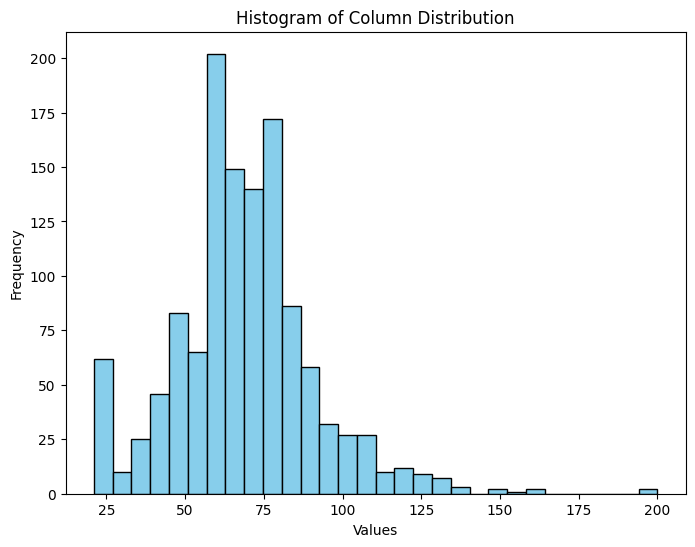

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(test_house_data['LotFrontage'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Distribution')
plt.show()


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


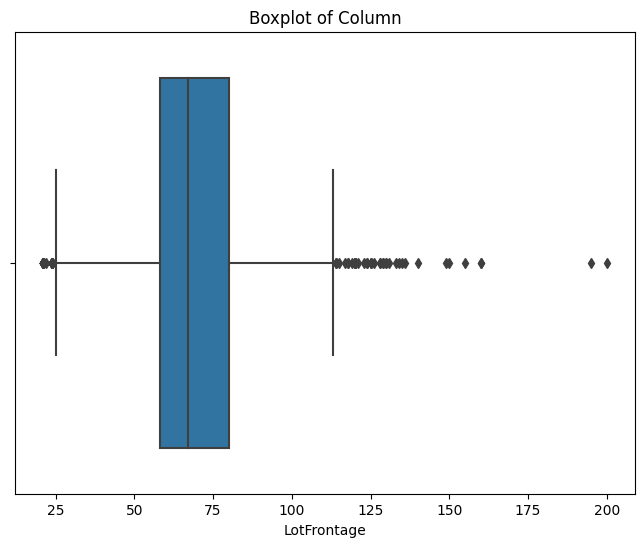

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=test_house_data['LotFrontage'])
plt.title('Boxplot of Column')
plt.show()


In [ ]:
# Calculate the median of the column
median_value =test_house_data['LotFrontage'].median()

# Fill missing values in the column with the calculated median
test_house_data['LotFrontage'].fillna(median_value, inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\2765897190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['LotFrontage'].fillna(median_value, inplace=True)


In [ ]:
test_house_data['MasVnrArea']

0         0.0
1       108.0
2         0.0
3        20.0
4         0.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458     94.0
Name: MasVnrArea, Length: 1459, dtype: float64

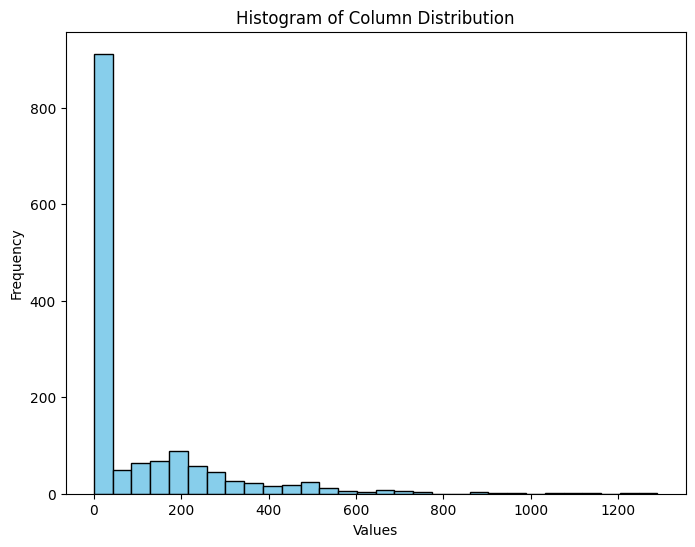

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(test_house_data['MasVnrArea'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Distribution')
plt.show()


In [ ]:
# Calculate the median of the column
median_value =test_house_data['MasVnrArea'].median()

# Fill missing values in the column with the calculated median
test_house_data['MasVnrArea'].fillna(median_value, inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\2795468113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['MasVnrArea'].fillna(median_value, inplace=True)


In [ ]:
test_house_data['BsmtQual'].value_counts()

BsmtQual
TA    634
Gd    591
Ex    137
Fa     53
Name: count, dtype: int64

In [ ]:
test_house_data['BsmtQual'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\2283587604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtQual'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
test_house_data['BsmtCond'].value_counts()

BsmtCond
TA    1295
Fa      59
Gd      57
Po       3
Name: count, dtype: int64

In [ ]:
test_house_data['BsmtCond'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\1800804869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtCond'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
test_house_data['BsmtExposure'].value_counts()    
  

BsmtExposure
No    951
Av    197
Gd    142
Mn    125
Name: count, dtype: int64

In [ ]:
test_house_data['BsmtExposure'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\579793280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtExposure'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
test_house_data['BsmtFinType1'].value_counts()            
 

BsmtFinType1
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: count, dtype: int64

In [ ]:
test_house_data['BsmtFinType1'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\3268587193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtFinType1'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
test_house_data['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: count, dtype: int64

In [ ]:
test_house_data['BsmtFinType2'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\3323765202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtFinType2'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
test_house_data['GarageYrBlt'].head()

0    1961.0
1    1958.0
2    1997.0
3    1998.0
4    1992.0
Name: GarageYrBlt, dtype: float64

In [ ]:
#Impute with a Default or Sentinel Value
test_house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\499787366.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1900-01-01 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_9756\499787366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


In [ ]:
test_house_data['GarageFinish'].value_counts()

GarageFinish
Unf    625
RFn    389
Fin    367
Name: count, dtype: int64

In [ ]:
test_house_data['GarageFinish'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\1227059960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageFinish'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
test_house_data['GarageQual'].value_counts()

GarageQual
TA    1293
Fa      76
Gd      10
Po       2
Name: count, dtype: int64

In [ ]:
test_house_data['GarageQual'].fillna("Unknown",inplace=True,axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_9756\2636186448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageQual'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
test_house_data['GarageType'].value_counts()

GarageType
Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: count, dtype: int64

In [ ]:
test_house_data['GarageType'].fillna("Unknown",inplace=True,axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_9756\4076784488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageType'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
test_house_data['GarageCond'].value_counts()

GarageCond
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: count, dtype: int64

In [ ]:
test_house_data['GarageCond'].fillna("Unknown",inplace=True,axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_9756\2553948615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageCond'].fillna("Unknown",inplace=True,axis=0)


In [ ]:
# Display columns with missing values and count of missing values in each column
missing_values = test_house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [ ]:
test_house_data.dropna(inplace=True,axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_9756\3521006030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data.dropna(inplace=True,axis=0)


In [ ]:
# Display columns with missing values and count of missing values in each column
missing_values = test_house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

Series([], dtype: int64)

In [ ]:
#columns with categorical data
categorical_columns=test_house_data.select_dtypes(include=['object','category'])
categorical_columns.T

,0,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
MSZoning,RH,RL,RL,RL,RL,RL,RL,RL,RL,RL,...,RM,RM,RL,RM,RM,RM,RM,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,IR1,IR1,IR1,IR1,IR1,IR1,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,Corner,Inside,Inside,Inside,Corner,Inside,Inside,Inside,Corner,...,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Mod,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Mod
Neighborhood,NAmes,NAmes,Gilbert,Gilbert,StoneBr,Gilbert,Gilbert,Gilbert,Gilbert,NAmes,...,MeadowV,MeadowV,Mitchel,MeadowV,MeadowV,MeadowV,MeadowV,Mitchel,Mitchel,Mitchel
Condition1,Feedr,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [ ]:
# Dummy encoding the categorical columns
dummy_variables = pd.get_dummies(categorical_columns, drop_first=True)
# Drop the original categorical columns from the DataFrame
test_data_encoded = test_house_data.drop(categorical_columns.columns, axis=1)
# Concatenate the dummy-encoded columns with the original DataFrame
test_data_encoded = pd.concat([test_data_encoded, dummy_variables], axis=1)


In [ ]:
# Selecting only the numerical columns
numerical_columns =test_data_encoded.select_dtypes(include=['number']).columns.tolist()
items_to_remove=['YrSold','MoSold','GarageYrBlt','YearBuilt','YearRemodAdd','Id']
# Removing multiple items using list comprehension
numerical_columns = [col for col in numerical_columns if col not in items_to_remove]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_data_encoded[numerical_columns] = scaler.fit_transform(test_data_encoded[numerical_columns])


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [ ]:
test_data_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,-0.877080,0.573414,0.386288,-0.764814,0.400229,1961,1961,-0.564847,0.059940,...,False,False,False,False,True,False,False,False,True,False
1,1462,-0.877080,0.622146,0.935027,-0.064299,0.400229,1958,1958,0.044414,1.059237,...,False,False,False,False,True,False,False,False,True,False
2,1463,0.057311,0.281024,0.844366,-0.764814,-0.507332,1997,1998,-0.564847,0.769331,...,False,False,False,False,True,False,False,False,True,False
3,1464,0.057311,0.475951,0.045219,-0.064299,0.400229,1998,1998,-0.452021,0.354239,...,False,False,False,False,True,False,False,False,True,False
4,1465,1.458899,-1.229663,-0.986493,1.336732,-0.507332,1992,1992,-0.564847,-0.390293,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,2.393290,-2.301763,-1.623196,-1.465330,1.307790,1970,1970,-0.564847,-0.967908,...,False,False,False,False,True,False,False,False,True,False
1455,2916,2.393290,-2.301763,-1.631910,-1.465330,-0.507332,1970,1970,-0.564847,-0.414452,...,False,False,False,False,True,False,False,False,False,False
1456,2917,-0.877080,4.471960,2.124411,-0.764814,1.307790,1960,1996,-0.564847,1.720311,...,False,False,False,False,True,False,False,False,False,False
1457,2918,0.641306,-0.303758,0.141275,-0.764814,-0.507332,1992,1992,-0.564847,-0.227770,...,False,False,False,False,True,False,False,False,True,False
